In [13]:
# Leemos el csv
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
filename='customer_segmentation_data.csv'
df=read_csv(filename)
df.head(10)



,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
5,6,31,Other,57305,24,3,30,Home & Garden,86.85
6,7,19,Other,54319,68,5,43,Clothing,191.72
7,8,43,Male,108115,94,9,27,Groceries,734.56
8,9,53,Male,34424,29,6,7,Sports,951.71
9,10,55,Female,45839,55,7,2,Electronics,821.18


In [14]:
# Eliminar datos duplicados
df_cleaned = df.drop_duplicates()

# Eliminar registros con campos vacíos
df_cleaned = df_cleaned.dropna()

print("Datos limpiados:")
print(df_cleaned)

df = df_cleaned

Datos limpiados:
       id  age  gender  income  spending_score  membership_years  \
0       1   38  Female   99342              90                 3   
1       2   21  Female   78852              60                 2   
2       3   60  Female  126573              30                 2   
3       4   40   Other   47099              74                 9   
4       5   65  Female  140621              21                 3   
..    ...  ...     ...     ...             ...               ...   
995   996   57    Male  112170              57                 6   
996   997   23   Other   65337              76                10   
997   998   23    Male  113097              40                 5   
998   999   22  Female  113695              63                 7   
999  1000   36  Female   90420               7                 2   

     purchase_frequency preferred_category  last_purchase_amount  
0                    24          Groceries                113.53  
1                    42         

In [6]:
# Visualizamos las estadisticas generales y comunes
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


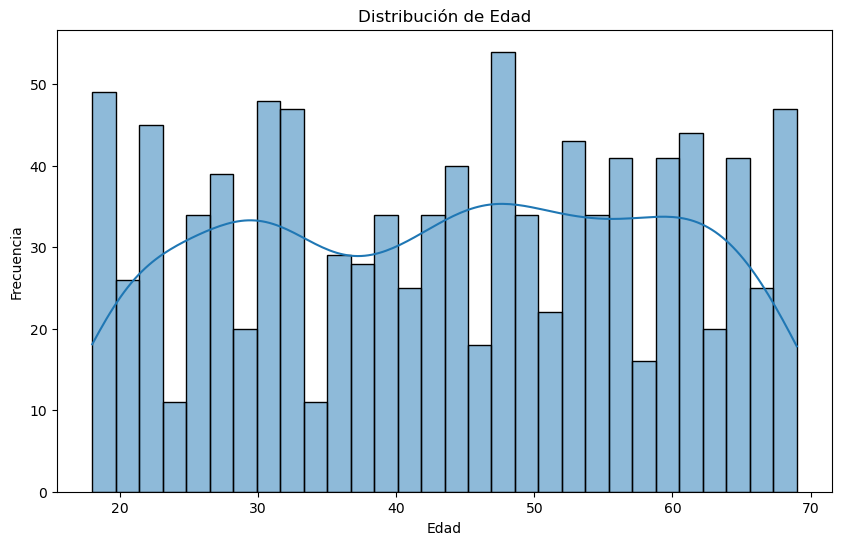

In [15]:
# Frecuencia de edades. Que tanto compran en rangos ciertos rangos de edad.
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [52]:
df_sorted = df.sort_values(by='age', ascending=False)

# Mostrar los primeros 10 registros del DataFrame ordenado
df_sorted.head(30)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,age_group
719,720,69,Other,72651,58,5,30,Electronics,103.11,66+
146,147,69,Male,90929,2,10,29,Electronics,518.70,66+
660,661,69,Female,34122,50,4,27,Sports,758.44,66+
214,215,69,Other,127086,93,4,45,Electronics,339.90,66+
219,220,69,Male,142216,90,7,29,Electronics,559.73,66+
...,...,...,...,...,...,...,...,...,...,...
164,165,64,Other,96494,10,4,47,Home & Garden,184.45,56-65
675,676,64,Female,48169,39,5,33,Groceries,451.86,56-65
613,614,64,Female,116106,5,1,5,Clothing,25.86,56-65
237,238,64,Other,148368,19,4,23,Groceries,949.32,56-65


C:\Users\mayon\AppData\Local\Temp\ipykernel_9616\1905118864.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_income_by_age_group = df.groupby('age_group')['income'].mean().reset_index()
c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


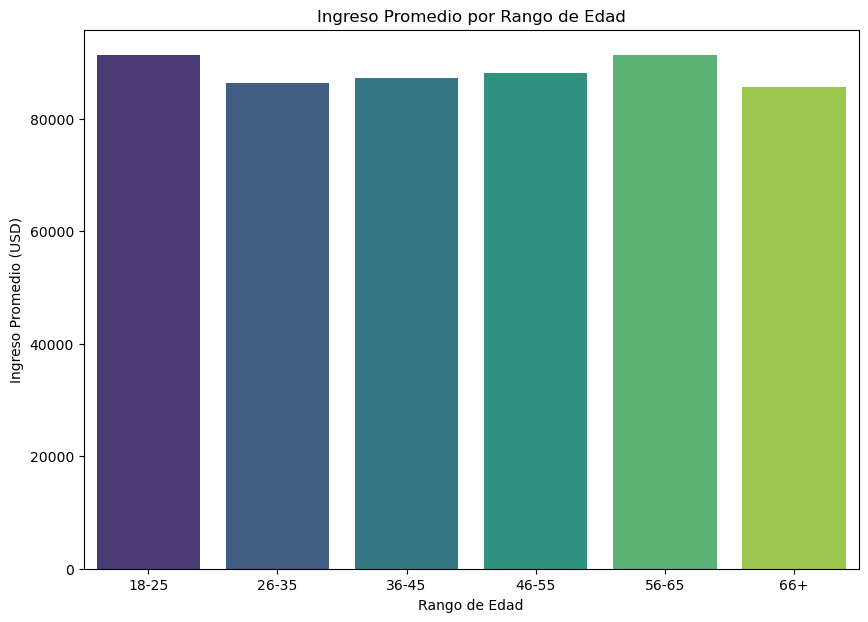

In [40]:
# Crear rangos de edad (bins)
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Crear una nueva columna 'age_group' con los rangos de edad
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calcular el ingreso promedio por grupo de edad
average_income_by_age_group = df.groupby('age_group')['income'].mean().reset_index()

# Crear el histograma
plt.figure(figsize=(10, 7))
sns.barplot(x='age_group', y='income', data=average_income_by_age_group, palette='viridis')
plt.title('Ingreso Promedio por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Ingreso Promedio (USD)')
plt.show()


C:\Users\mayon\AppData\Local\Temp\ipykernel_9616\3742245.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spending_score_by_age_group = df.groupby('age_group')['spending_score'].mean().reset_index()
c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


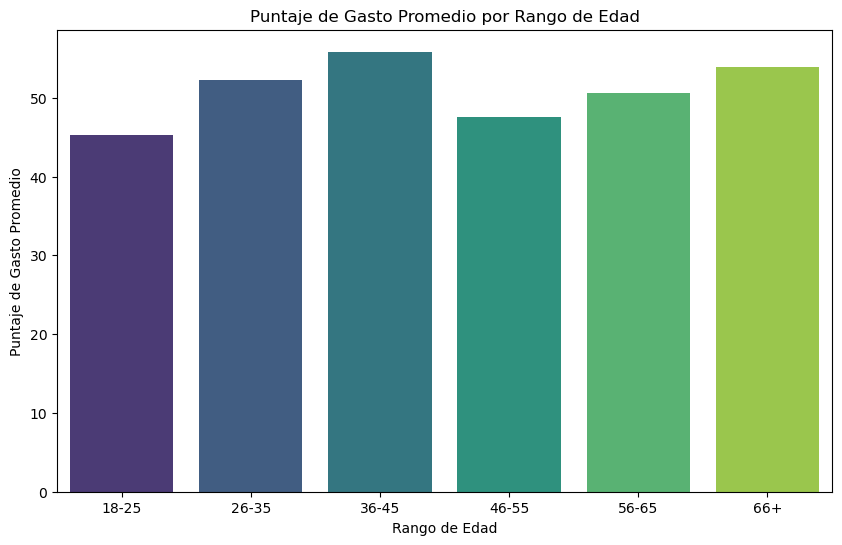

In [41]:
# Crear rangos de edad
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Crear una nueva columna 'age_group' con los rangos de edad
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calcular el puntaje de gasto promedio por grupo de edad
average_spending_score_by_age_group = df.groupby('age_group')['spending_score'].mean().reset_index()

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='spending_score', data=average_spending_score_by_age_group, palette='viridis')
plt.title('Puntaje de Gasto Promedio por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Puntaje de Gasto Promedio')
plt.show()


In [44]:
# Obtener los tipos únicos de categorías en 'preferred_category'
unique_categories = df['preferred_category'].unique()

# Mostrar los tipos únicos de categorías
print("Categorías: ")
for category in unique_categories:
    print(category)

Categorías: 
Groceries
Sports
Clothing
Home & Garden
Electronics


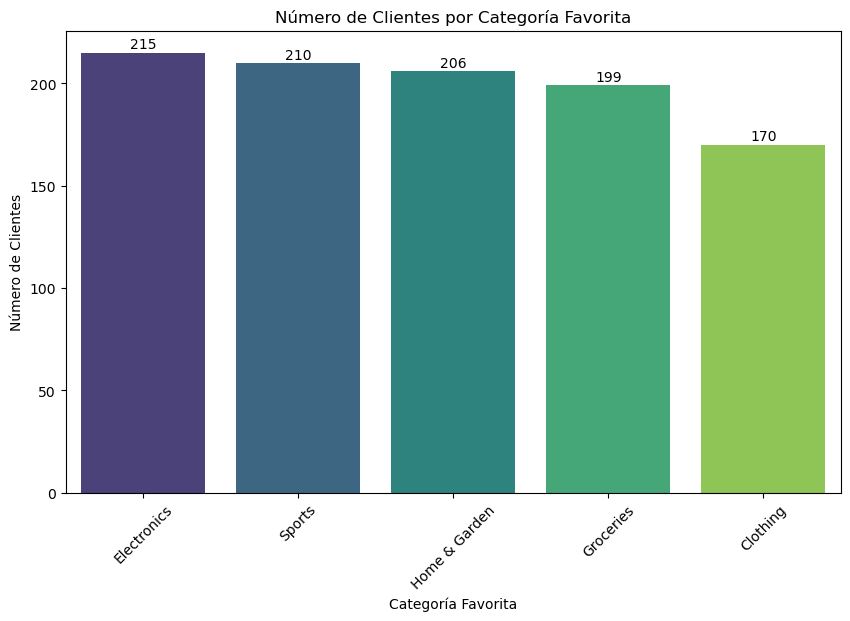

In [46]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# Añadir etiquetas con los conteos exactos
for index, value in enumerate(category_counts.values):
    barplot.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.title('Número de Clientes por Categoría Favorita')
plt.xlabel('Categoría Favorita')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.show()

C:\Users\mayon\AppData\Local\Temp\ipykernel_9616\3800898346.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_age_counts = df.groupby(['age_group', 'preferred_category']).size().reset_index(name='count')
c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed

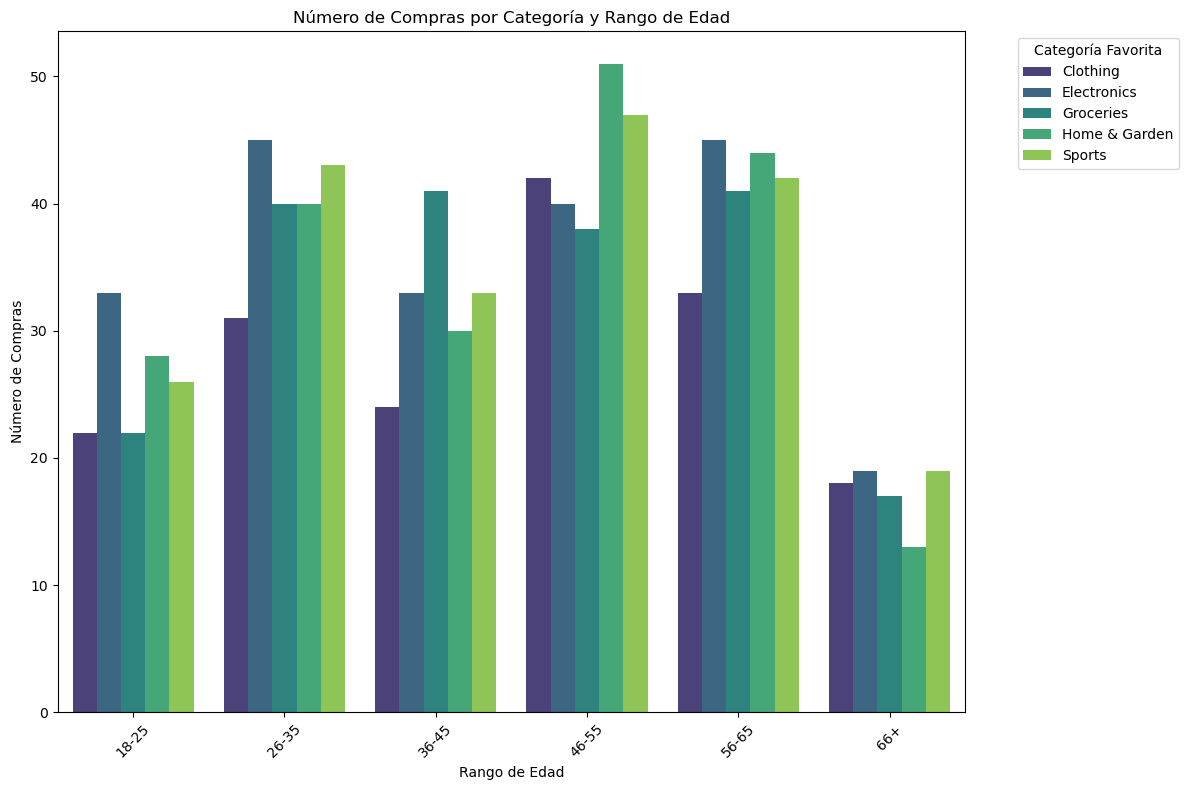

In [48]:
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Crear una nueva columna 'age_group' con los rangos de edad
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Contar el número de compras por combinación de rango de edad y categoría
category_age_counts = df.groupby(['age_group', 'preferred_category']).size().reset_index(name='count')

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=category_age_counts, x='age_group', y='count', hue='preferred_category', palette='viridis')

# Configurar el gráfico
plt.title('Número de Compras por Categoría y Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Compras')
plt.legend(title='Categoría Favorita', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se corten
plt.show()

In [53]:
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Crear una nueva columna 'age_group' con los rangos de edad
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Filtrar los datos para el rango de edad '66+'
age_66_plus = df[df['age_group'] == '66+']

# Contar el número de veces que aparece cada categoría en el rango de edad '66+'
category_counts_66_plus = age_66_plus['preferred_category'].value_counts()

# Imprimir el número de veces que aparece cada categoría
print("Número de veces que aparece cada categoría en el rango de edad 66+:")
print(category_counts_66_plus)

Número de veces que aparece cada categoría en el rango de edad 66+:
preferred_category
Electronics      19
Sports           19
Clothing         18
Groceries        17
Home & Garden    13
Name: count, dtype: int64


c:\Users\mayon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mayon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

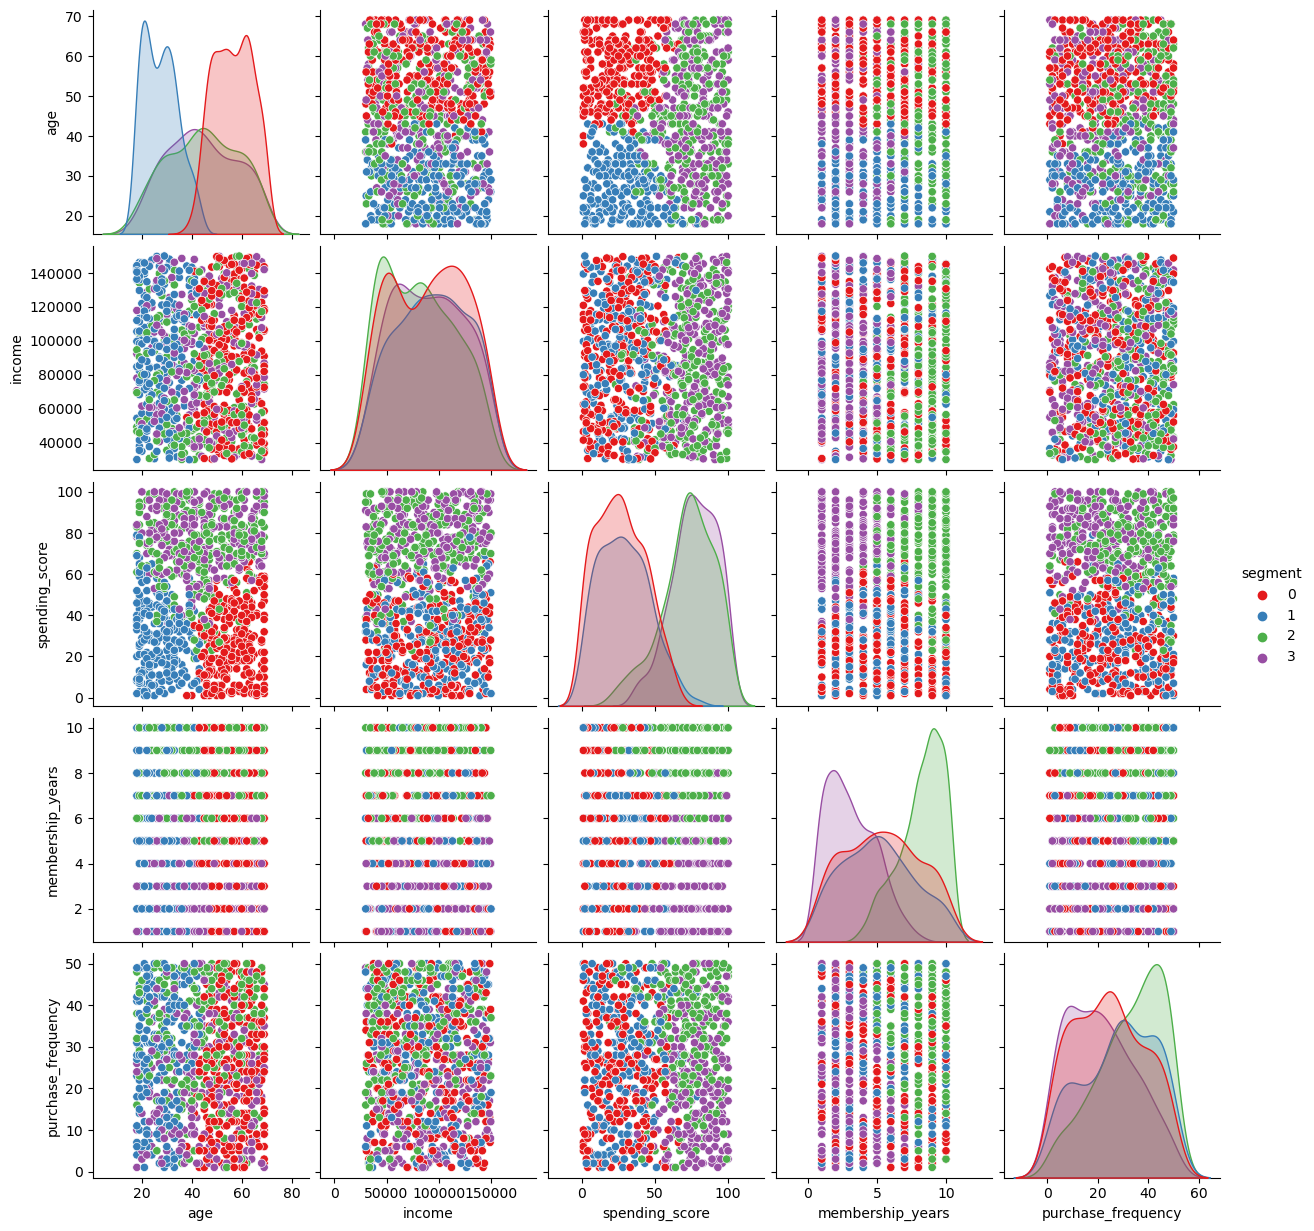

segment
0    278
2    249
3    242
1    231
Name: count, dtype: int64


In [61]:
from sklearn.cluster import KMeans

# Seleccionamos las características para el clustering
features = df[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency']]

# Normalizamos las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicamos K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Ajusta el número de clusters según sea necesario
df['segment'] = kmeans.fit_predict(features_scaled)

# Visualizamos los segmentos
sns.pairplot(df, hue='segment', vars=['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency'],palette='Set1')
plt.show()

# Imprimir la cantidad de clientes en cada segmento
print(df['segment'].value_counts())


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Primlimpiamos los datos eliminando duplicados y registros con campos vacíos
df_cleaned = df.drop_duplicates().dropna()

# Seleccionamos las características para el clustering
features = df_cleaned[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency']]

# Normalizamos las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicamos K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Ajusta el número de clusters según sea necesario
df_cleaned['segment'] = kmeans.fit_predict(features_scaled)

# Seleccionamos solo las columnas numéricas
numeric_columns = df_cleaned.select_dtypes(include='number')

# Calcular la cantidad promedio de cada grupo en cada característica numérica
segment_summary = numeric_columns.groupby(df_cleaned['segment']).mean()

# Imprimir el resumen de cada segmento
print("Cantidad promedio de cada grupo en cada característica:")
print(segment_summary)


c:\Users\mayon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mayon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cantidad promedio de cada grupo en cada característica:
                 id        age        income  spending_score  \
segment                                                        
0        500.892086  56.384892  89828.870504       26.503597   
1        502.385281  27.493506  92973.961039       28.839827   
2        493.534137  44.469880  81269.489960       72.433735   
3        505.417355  44.148760  90145.809917       76.938017   

         membership_years  purchase_frequency  last_purchase_amount  segment  
segment                                                                       
0                5.359712           24.352518            508.851835      0.0  
1                5.086580           28.160173            488.022121      1.0  
2                8.232932           32.899598            500.745622      2.0  
3                3.115702           21.194215            468.880537      3.0  


c:\Users\mayon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mayon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

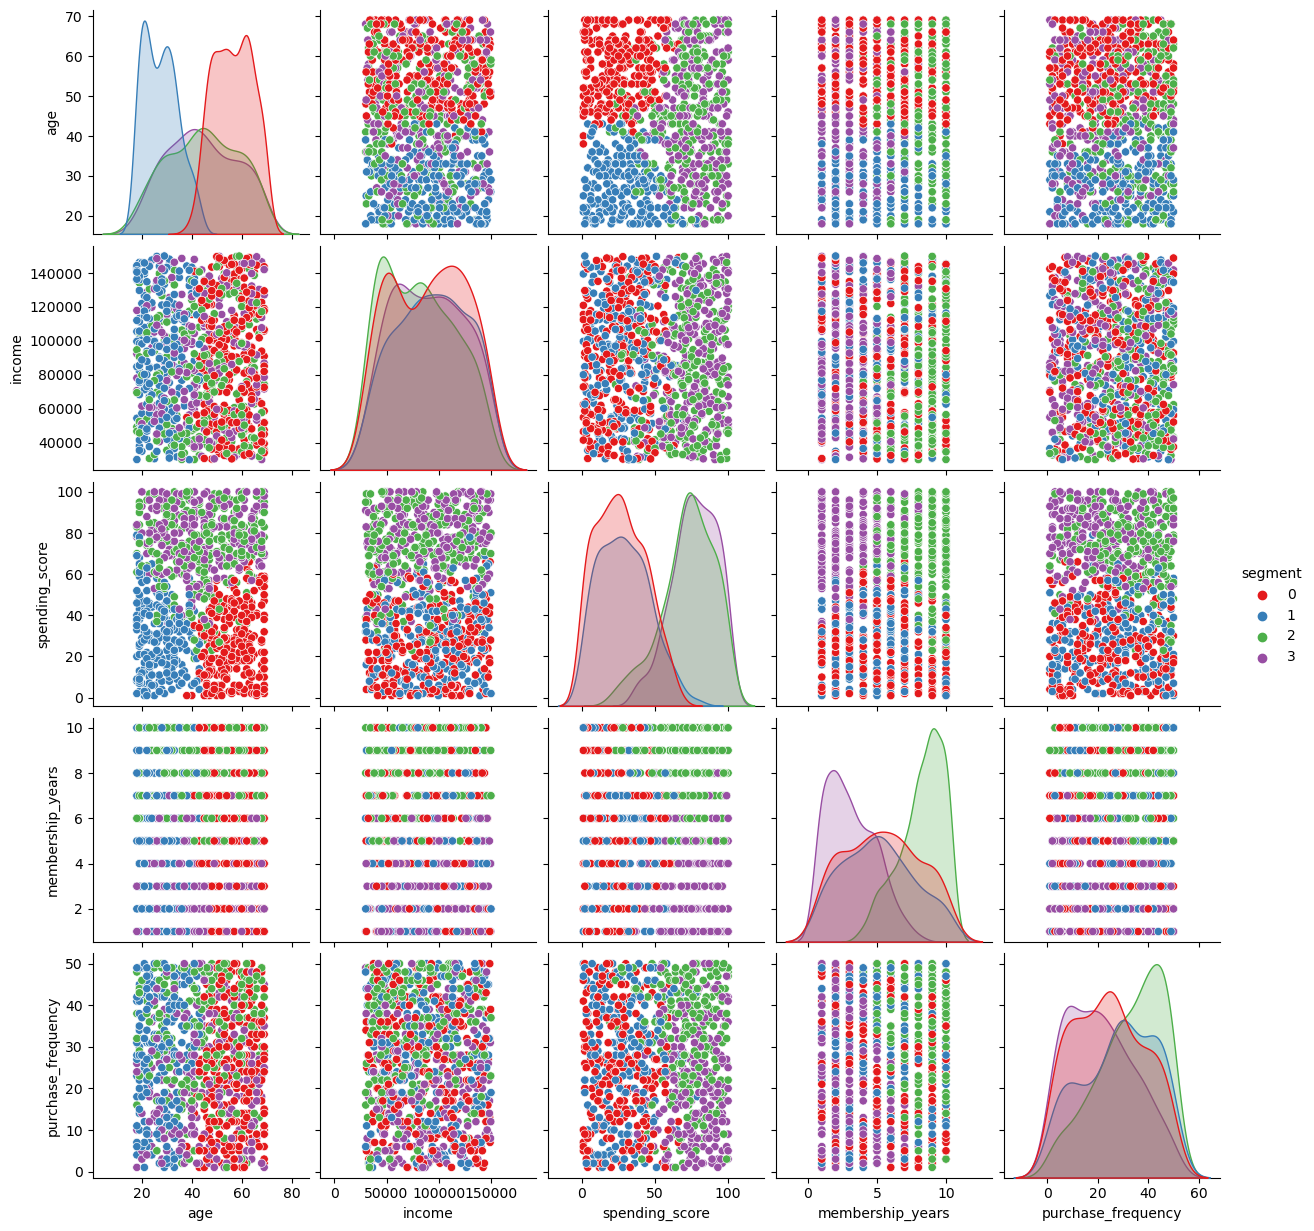

Número de clientes en cada segmento:
segment
0    278
2    249
3    242
1    231
Name: count, dtype: int64

Resumen de estadísticas por segmento:
               age        income  spending_score  membership_years  \
segment                                                              
0        56.384892  89828.870504       26.503597          5.359712   
1        27.493506  92973.961039       28.839827          5.086580   
2        44.469880  81269.489960       72.433735          8.232932   
3        44.148760  90145.809917       76.938017          3.115702   

         purchase_frequency  
segment                      
0                 24.352518  
1                 28.160173  
2                 32.899598  
3                 21.194215  

Número de la categoría que más compra en cada clúster:
segment
0    Home & Garden
1      Electronics
2      Electronics
3        Groceries
dtype: object


In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supongamos que tu DataFrame se llama df
# Primero, limpiamos los datos eliminando duplicados y registros con campos vacíos
df_cleaned = df.drop_duplicates().dropna()

# Asignar valores numéricos a las categorías
category_mapping = {
    'Electronics': 0,
    'Sports': 1,
    'Clothing': 2,
    'Groceries': 3,
    'Home & Garden': 4
}
df_cleaned['preferred_category_num'] = df_cleaned['preferred_category'].map(category_mapping)

# Seleccionamos las características para el clustering, incluyendo la categoría numérica
features = df_cleaned[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency']]

# Normalizamos las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicamos K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Ajusta el número de clusters según sea necesario
df_cleaned['segment'] = kmeans.fit_predict(features_scaled)

# Visualizamos los segmentos
sns.pairplot(df_cleaned, hue='segment', vars=['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency'],palette='Set1')
plt.show()

# Imprimir la cantidad de clientes en cada segmento
print("Número de clientes en cada segmento:")
print(df_cleaned['segment'].value_counts())

# Agrupar por segmentos y calcular estadísticas descriptivas solo para las columnas numéricas
segment_summary = df_cleaned.groupby('segment')[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency']].mean()

# Imprimir el resumen de cada segmento
print("\nResumen de estadísticas por segmento:")
print(segment_summary)

# Resumen del comportamiento de gasto y preferencias por segmento
fidelization_summary = df_cleaned.groupby('segment').agg({
    'spending_score': 'mean',
    'preferred_category_num': lambda x: x.mode()[0]  # Obtener la moda en lugar del promedio
})

# Mapear los valores numéricos de vuelta a las categorías
reverse_category_mapping = {v: k for k, v in category_mapping.items()}
fidelization_summary['preferred_category'] = fidelization_summary['preferred_category_num'].map(reverse_category_mapping)



# Imprimir la categoría más frecuente en cada clúster
print("\nNúmero de la categoría que más compra en cada clúster:")
category_counts = df_cleaned.groupby(['segment', 'preferred_category']).size().unstack().fillna(0)
most_frequent_category = category_counts.idxmax(axis=1)
print(most_frequent_category)


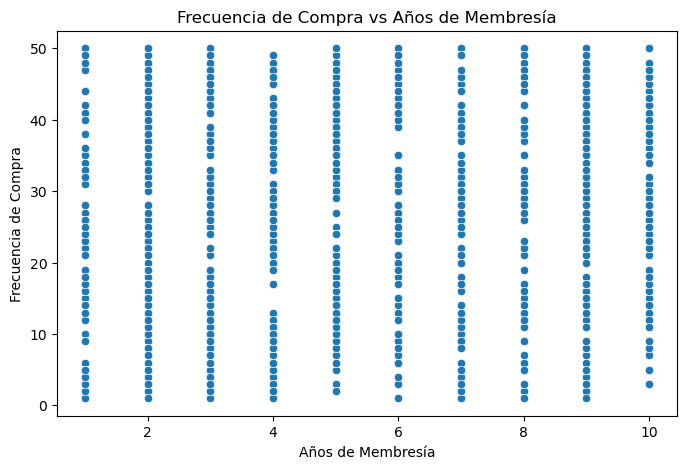

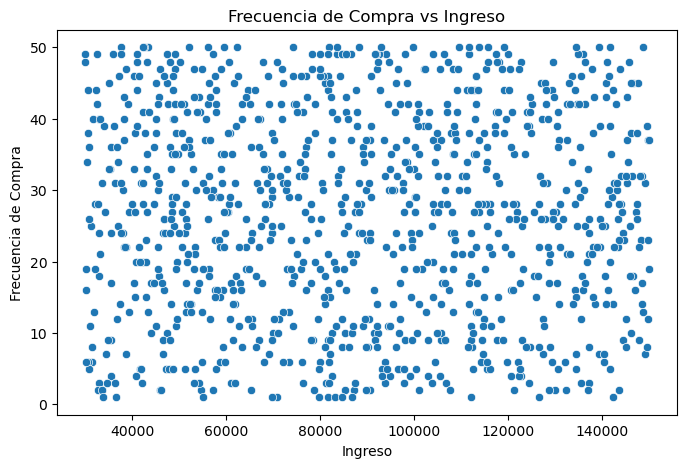

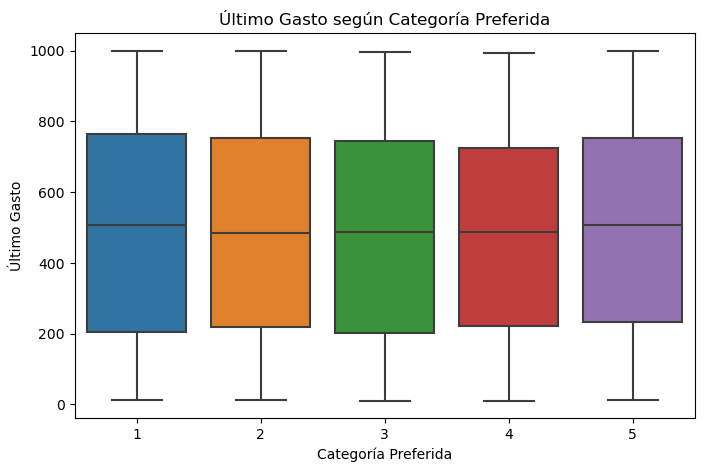

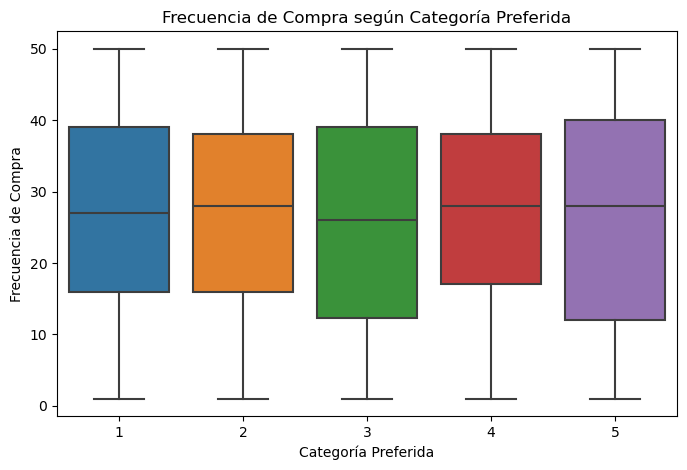

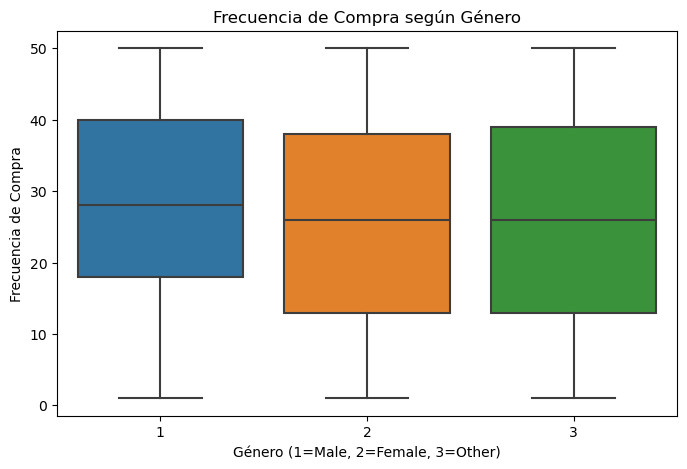

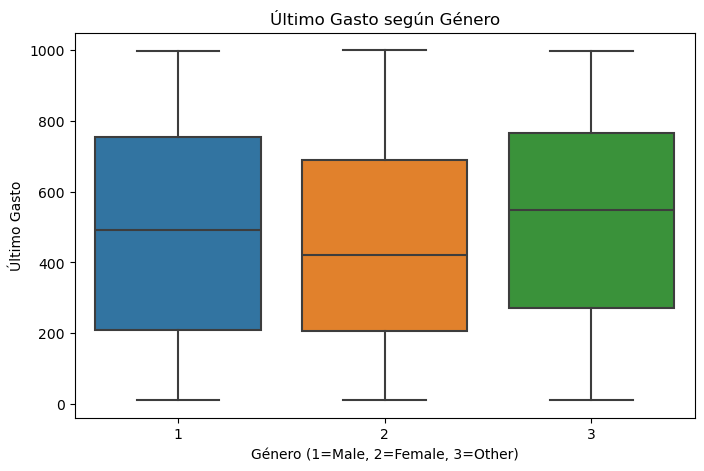

c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


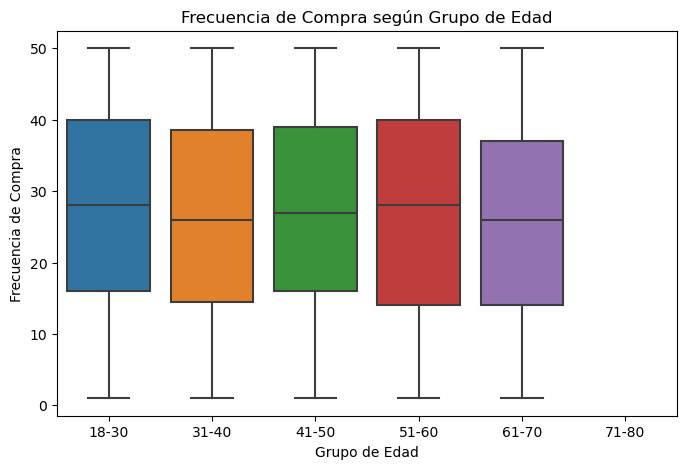

c:\Users\mayon\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


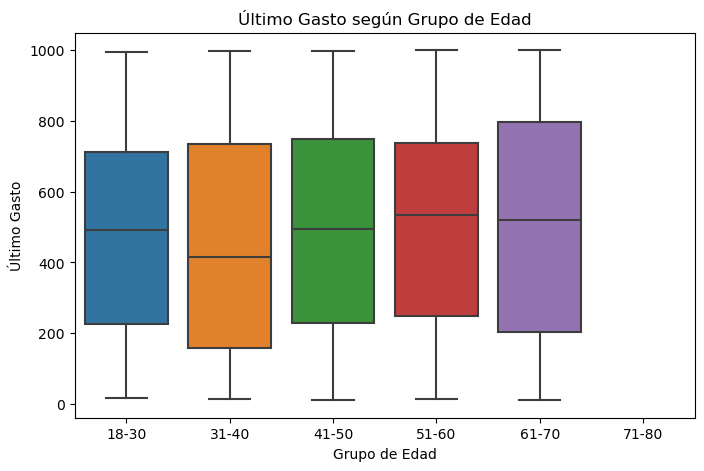

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
filename = 'customer_segmentation_data.csv'  # Cambia esta ruta a la correcta
customer_data = pd.read_csv(filename)

# Modificar la columna 'gender' con los valores asignados
gender_mapping = {'Male': 1, 'Female': 2, 'Other': 3}
customer_data['gender'] = customer_data['gender'].map(gender_mapping)

# Modificar la columna 'preferred_category' con los valores asignados
category_mapping = {
    'Electronics': 1,
    'Sports': 2,
    'Clothing': 3,
    'Groceries': 4,
    'Home & Garden': 5
}
customer_data['preferred_category'] = customer_data['preferred_category'].map(category_mapping)

# Crear grupos de edad
customer_data['age_group'] = pd.cut(customer_data['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# 1. Frecuencia de compra vs Membership Years
plt.figure(figsize=(8, 5))
sns.scatterplot(x='membership_years', y='purchase_frequency', data=customer_data)
plt.title("Frecuencia de Compra vs Años de Membresía")
plt.xlabel("Años de Membresía")
plt.ylabel("Frecuencia de Compra")
plt.show()

# 2. Frecuencia de compra vs Ingreso
plt.figure(figsize=(8, 5))
sns.scatterplot(x='income', y='purchase_frequency', data=customer_data)
plt.title("Frecuencia de Compra vs Ingreso")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia de Compra")
plt.show()

# 3. Último Gasto vs Categoría Preferida
plt.figure(figsize=(8, 5))
sns.boxplot(x='preferred_category', y='last_purchase_amount', data=customer_data)
plt.title("Último Gasto según Categoría Preferida")
plt.xlabel("Categoría Preferida")
plt.ylabel("Último Gasto")
plt.show()

# 4. Frecuencia de compra según categoría preferida
plt.figure(figsize=(8, 5))
sns.boxplot(x='preferred_category', y='purchase_frequency', data=customer_data)
plt.title("Frecuencia de Compra según Categoría Preferida")
plt.xlabel("Categoría Preferida")
plt.ylabel("Frecuencia de Compra")
plt.show()

# 5. Frecuencia de compra según género
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='purchase_frequency', data=customer_data)
plt.title("Frecuencia de Compra según Género")
plt.xlabel("Género (1=Male, 2=Female, 3=Other)")
plt.ylabel("Frecuencia de Compra")
plt.show()

# 6. Último Gasto según género
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='last_purchase_amount', data=customer_data)
plt.title("Último Gasto según Género")
plt.xlabel("Género (1=Male, 2=Female, 3=Other)")
plt.ylabel("Último Gasto")
plt.show()

# 7. Frecuencia de compra según grupo de edad
plt.figure(figsize=(8, 5))
sns.boxplot(x='age_group', y='purchase_frequency', data=customer_data)
plt.title("Frecuencia de Compra según Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Frecuencia de Compra")
plt.show()

# 8. Último Gasto según grupo de edad
plt.figure(figsize=(8, 5))
sns.boxplot(x='age_group', y='last_purchase_amount', data=customer_data)
plt.title("Último Gasto según Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Último Gasto")
plt.show()


   id  age  gender  income  spending_score  membership_years  \
0   1   38       2   99342              90                 3   
1   2   21       2   78852              60                 2   
2   3   60       2  126573              30                 2   
3   4   40       3   47099              74                 9   
4   5   65       2  140621              21                 3   

   purchase_frequency  preferred_category  last_purchase_amount  
0                  24                   4                113.53  
1                  42                   2                 41.93  
2                  28                   3                424.36  
3                   5                   5                991.93  
4                  25                   1                347.08  


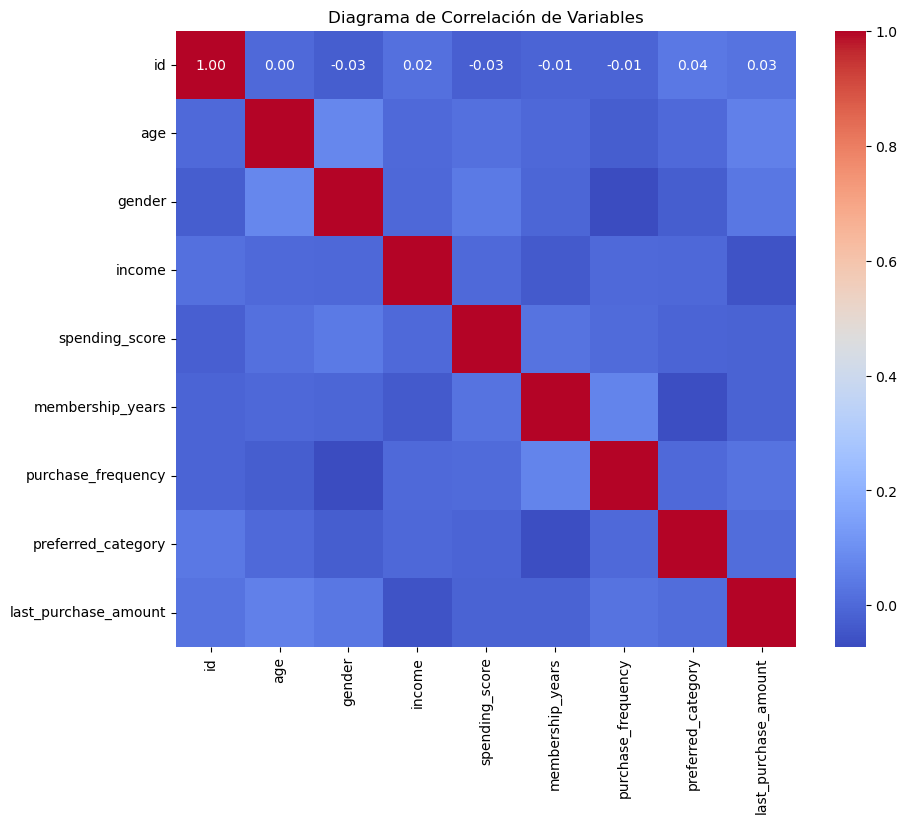

In [8]:
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns


filename='customer_segmentation_data.csv'
customer=read_csv(filename)

# 1. Modificar la columna 'gender' con los valores asignados
gender_mapping = {'Male': 1, 'Female': 2, 'Other': 3}
customer['gender'] = customer['gender'].map(gender_mapping)

# 2. Modificar la columna 'preferred_category' con los valores asignados
category_mapping = {
    'Electronics': 1,
    'Sports': 2,
    'Clothing': 3,
    'Groceries': 4,
    'Home & Garden': 5
}
customer['preferred_category'] = customer['preferred_category'].map(category_mapping)

# Mostrar los primeros datos normalizados
print(customer.head())

# Calcular la matriz de correlación
correlation_matrix = customer.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Diagrama de Correlación de Variables')
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
filename = 'customer_segmentation_data.csv'  # Cambia esta ruta por la correcta
customer_data = pd.read_csv(filename)

# 1. Modificar la columna 'gender' con los valores asignados
gender_mapping = {'Male': 1, 'Female': 2, 'Other': 3}
customer_data['gender'] = customer_data['gender'].map(gender_mapping)

# 2. Modificar la columna 'preferred_category' con los valores asignados
category_mapping = {
    'Electronics': 1,
    'Sports': 2,
    'Clothing': 3,
    'Groceries': 4,
    'Home & Garden': 5
}
customer_data['preferred_category'] = customer_data['preferred_category'].map(category_mapping)

# Definir las características (features) y la variable objetivo (target)
X = customer_data[['age', 'income', 'membership_years', 'last_purchase_amount', 'gender', 'preferred_category']]
y = customer_data['purchase_frequency']

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Bosques Aleatorios
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo usando Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Imprimir el resultado
print(f"Mean Squared Error del modelo: {mse}")

# Mostrar las primeras predicciones comparadas con los valores reales
comparison_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(comparison_df.head())


Mean Squared Error del modelo: 218.1325515
     Real  Predicción
521    13       21.38
737    42       28.63
740    36       27.52
660    27       25.24
411    14       29.00


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#Support Vector Machines

# Cargar los datos
filename = 'customer_segmentation_data.csv'  # Cambia esta ruta por la correcta
customer_data = pd.read_csv(filename)

# Modificar la columna 'gender' con los valores asignados
gender_mapping = {'Male': 1, 'Female': 2, 'Other': 3}
customer_data['gender'] = customer_data['gender'].map(gender_mapping)

# Crear grupos de edad
customer_data['age_group'] = pd.cut(customer_data['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Variables categóricas a One-Hot Encode
categorical_features = ['preferred_category', 'age_group']

# Características seleccionadas
X = customer_data[['age', 'income', 'spending_score', 'membership_years', 'last_purchase_amount', 'gender']]

# Añadir las columnas categóricas
X = pd.concat([X, customer_data[categorical_features]], axis=1)

# Variable objetivo
y = customer_data['purchase_frequency']

# Definir el preprocesador para hacer One-Hot Encoding y escalar las variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'income', 'spending_score', 'membership_years', 'last_purchase_amount', 'gender']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Crear el pipeline con Support Vector Regressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_pipeline.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model_pipeline.predict(X_test)

# Evaluar el rendimiento del modelo usando Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Imprimir el resultado
print(f"Mean Squared Error del modelo: {mse}")

# Mostrar las primeras predicciones comparadas con los valores reales
comparison_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(comparison_df.head())



Mean Squared Error del modelo: 209.2872757496009
     Real  Predicción
521    13   26.306912
737    42   27.354055
740    36   28.353661
660    27   25.572721
411    14   26.445129
